In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### How might we predict the winner of an EPL soccer match for fans in a way that utilizes a modified Google PageRank algorithm leveraging game performance from previous games so that we can provide more accurate predictions that adjust with each game week.

In [2]:
week_num = 4

In [5]:
G = nx.DiGraph()
df = pd.read_csv('final_2023.csv')
df['cost'] = (df['Home_Score'] - df['Away_Score'])

last_three = [week_num-3,week_num-2,week_num-1]

df = df[df['Wk'].isin(last_three)]

In [6]:
edgelist = list(zip(df['Home'], df['Away'], df['cost']))

mod_edgelist = []
for t in edgelist:
    if t[2] < 0:
        modified_tuple = (t[0], t[1], round(abs(t[2]), 2))
    else:
        modified_tuple = (t[1], t[0], round(t[2], 2))

    mod_edgelist.append(modified_tuple)


nodelist = pd.unique(df['Home'])
# Assuming week_1_df is a pandas DataFrame with columns 'Home', 'Away', and 'cost'
weightlist = dict(zip(zip(mod_edgelist[0], mod_edgelist[1]), mod_edgelist[2]))


for team1, team2, weight in mod_edgelist:
    G.add_edge(team1, team2, weight=weight)
    # G.add_edge(team2, team1, weight=-weight)


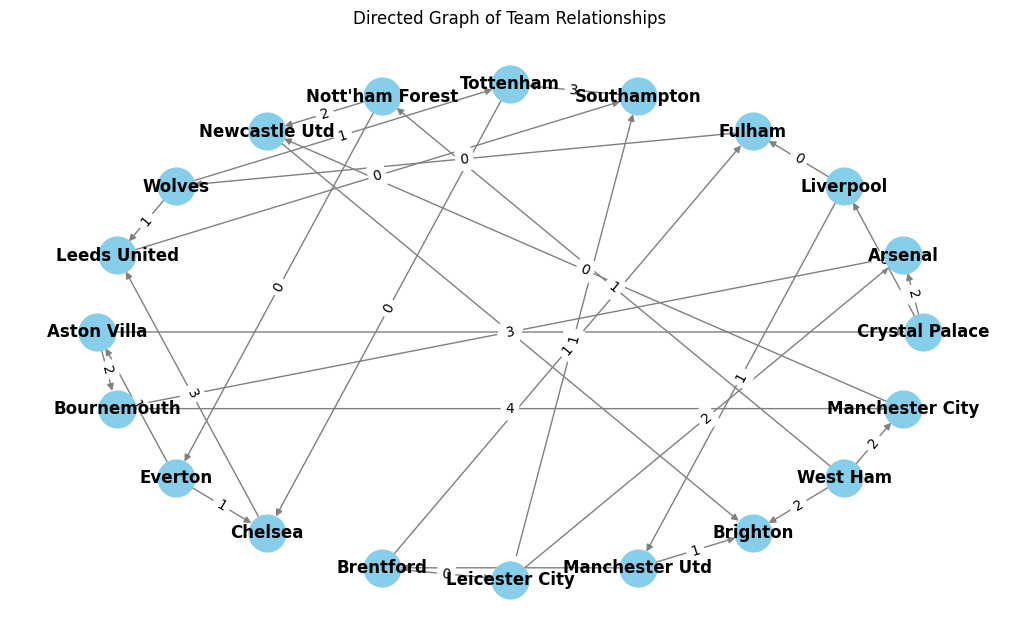

In [7]:
edge_labels = nx.get_edge_attributes(G, 'weight')

pos = nx.circular_layout(G)
plt.figure(figsize=(10, 6))

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, font_color='black', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Directed Graph of Team Relationships")
plt.show()

In [8]:
nx.pagerank(G)

{'Crystal Palace': 0.04590255793899394,
 'Arsenal': 0.10052613206603954,
 'Liverpool': 0.028588667023642843,
 'Fulham': 0.08345689560574099,
 'Southampton': 0.03668854635226496,
 'Tottenham': 0.07192355323233296,
 "Nott'ham Forest": 0.03344859462081612,
 'Newcastle Utd': 0.05701956254744354,
 'Wolves': 0.028588667023642843,
 'Leeds United': 0.07536626784727823,
 'Aston Villa': 0.04073848601657602,
 'Bournemouth': 0.04590255793899394,
 'Everton': 0.028588667023642843,
 'Chelsea': 0.04073848601657602,
 'Brentford': 0.0645534075640733,
 'Leicester City': 0.028588667023642843,
 'Manchester Utd': 0.0528883050095092,
 'Brighton': 0.047299707353097,
 'West Ham': 0.028588667023642843,
 'Manchester City': 0.060603604772050367}